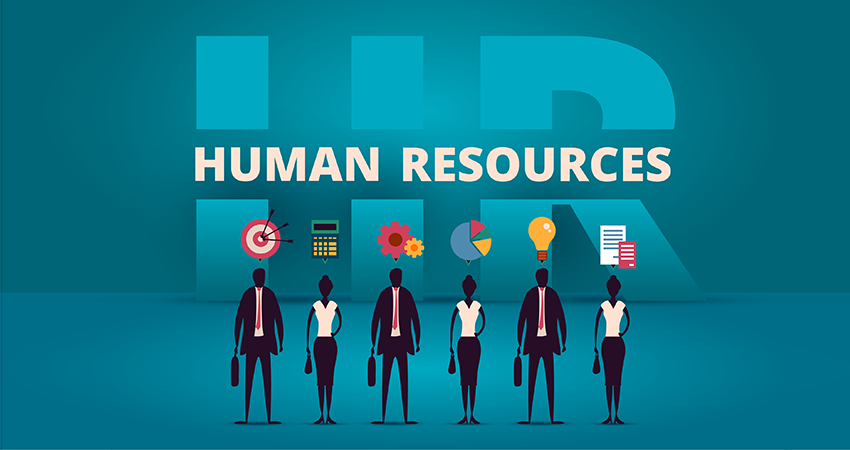

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Project Descripition

- client for this project is the HR Department at a software company.

They want to try a new initiative to retain employees.
The idea is to use data to predict whether an employee is likely to leave.
Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.
They only want to deal with the data that is related to permanent employees.
Current Practice
Once an employee leaves, he or she is taken an interview with the name “exit interview” and shares reasons for leaving. The HR Department then tries and learns insights from the interview and makes changes accordingly.

- This suffers from the following problems:

This approach is that it's too haphazard. The quality of insight gained from an interview depends heavily on the skill of the interviewer.
The second problem is these insights can't be aggregated and interlaced across all employees who have left.
The third is that it is too late by the time the proposed policy changes take effect.

- Deliverables :

Predict whether an employee will stay or leave.

# Data set discription

The Business Intelligence Analysts of the Company provided with three datasets that contain information about past employees and their status (still employed or already left).

**1 department_data**
This dataset contains information about each department. The schema of the dataset is as follows:

dept_id – Unique Department Code
dept_name – Name of the Department
dept_head – Name of the Head of the Department

**2 employee_details_data**
This dataset consists of Employee ID, their Age, Gender and Marital Status. The schema of this dataset is as follows:

- employee_id -Unique ID Number for each employee
- age – Age of the employee
- gender – Gender of the employee
- marital_status – Marital Status of the employee

**3 employee_data**
This dataset consists of each employee’s Administrative Information, Workload Information, Mutual Evaluation Information and Status.

**Target variable**

- status – Current employment status (Employed / Left)

**Administrative information**

- department – Department to which the employees belong(ed) to
- salary – Salary level with respect to rest of their department
- tenure – Number of years at the company
- recently_promoted – Was the employee promoted in the last 3 years?
- employee_id – Unique ID Number for each employee

**Workload information**

- n_projects – Number of projects employee has worked on
- avg_monthly_hrs – Average number of hours worked per month

**Mutual evaluation information**

- satisfaction – Score for employee’s satisfaction with the company (higher is better)
- last_evaluation – Score for most recent evaluation of employee (higher is better)
- filed_complaint – Has the employee filed a formal complaint in the last 3 years?

# Importing Libraries and packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# installing mysql-connector
!pip install mysql-connector-python

     |████████████████████████████████| 25.2 MB 1.6 MB/s 


In [ ]:
# importing connector from MYSQLCOnnector class
import mysql.connector 

# importing errorcode for try and catch
from mysql.connector import errorcode 

# Data Acusition using SQL-Connector

In [ ]:
# connecting server
con  = mysql.connector.connect(
    host = 'cpanel.insaid.co',
    user = 'student',
    passwd = 'student',
    database = 'Capstone2'
)

if con.is_connected:
  print("connection successful")
else:
  print("Connection failed")

connection successful


In [ ]:
'''
try:
  con = mysql.connector.connect( 
    host = 'cpanel.insaid.co',
    user = 'student',
    passwd = 'student',
    database = 'Capstone2')
  if con.is_connected:
    print("connection successful")
  else:
    print("Connection failed")
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with your user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
'''

'\ntry:\n  con = mysql.connector.connect( \n    host = \'cpanel.insaid.co\',\n    user = \'student\',\n    passwd = \'student\',\n    database = \'Capstone2\')\n  if con.is_connected:\n    print("connection successful")\n  else:\n    print("Connection failed")\nexcept mysql.connector.Error as err:\n  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:\n    print("Something is wrong with your user name or password")\n  elif err.errno == errorcode.ER_BAD_DB_ERROR:\n    print("Database does not exist")\n  else:\n    print(err)\n'

In [ ]:
# Get a cursor
# cur = con.cursor() # cursor is pointer to address of row of database


query1 = ("SELECT * FROM department_data")
query2 = ("SELECT * FROM employee_details_data")
query3 = ('SELECT * FROM employee_data')

# cur.execute(query1)
# myresult = cur.fetchall()  # this is database all rows stored in myresult
# print(i) for i in myresult

department_data_ds = pd.read_sql(query1,con, columns=['dept_id', 'dept_name', 'dept_head']) # we can ignore columns
employee_details_data_ds = pd.read_sql(query2,con,columns=['employee_id ','age','gender','marital_status'])
employee_data_ds = pd.read_sql(query3,con)

# cur.close()
con.close()
# Execute a query

In [ ]:
department_data_ds.head()

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray


In [ ]:
employee_details_data_ds.head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [ ]:
employee_data_ds.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707


In [ ]:
# checking the shape/columns of each dataset to merge in future
print(" department dataset has shape of {} with colums as {} \n".format(department_data_ds.shape,department_data_ds.columns))
print(" Employee details dataset has shape of {} with colums as {} \n".format(employee_details_data_ds.shape,employee_details_data_ds.columns))
print(" employee dataset has shape of {} with colums as {} ".format(employee_data_ds.shape,employee_data_ds.columns))

 department dataset has shape of (11, 3) with colums as Index(['dept_id', 'dept_name', 'dept_head'], dtype='object') 

 Employee details dataset has shape of (14245, 4) with colums as Index(['employee_id', 'age', 'gender', 'marital_status'], dtype='object') 

 employee dataset has shape of (14150, 11) with colums as Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure', 'employee_id'],
      dtype='object') 


# Understanding the DEPARTMENT DATA

In [ ]:
# creating copies
dept =  department_data_ds

In [ ]:
dept.describe(include='all')

,dept_id,dept_name,dept_head
count,11,11,11
unique,11,11,11
top,D00-IT,IT,Henry Adey
freq,1,1,1


In [ ]:
dept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


In [ ]:
dept.head(11)

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray
5,D00-FN,Finance,Aanchal J
6,D00-PR,Procurement,Louie Viles
7,D00-AD,Admin,Evelyn Tolson
8,D00-MN,Management,Ellie Trafton
9,D00-MT,Marketing,Reuben Swann


- we can see that there are total of 11 department being lead by unique 11 head of department .

# understanding employee detail dataset 

In [ ]:
# creating copy
emp_detail = employee_details_data_ds


In [ ]:
emp_detail.describe(include='all')

,employee_id,age,gender,marital_status
count,14245.000000,14245.000000,14245,14245
unique,NaN,NaN,2,2
top,NaN,NaN,Male,Unmarried
freq,NaN,NaN,9382,7283
mean,112123.050544,32.889926,NaN,NaN
std,8500.457343,9.970834,NaN,NaN
min,100101.000000,22.000000,NaN,NaN
25%,105775.000000,24.000000,NaN,NaN
50%,111298.000000,29.000000,NaN,NaN
75%,116658.000000,41.000000,NaN,NaN


In [ ]:
emp_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [ ]:
emp_detail.sample() # can also use tail/head

,employee_id,age,gender,marital_status
211,111433,27,Female,Married


In [ ]:
# checking if any duplicate entry is there in the employee details.
emp_detail.duplicated().any()

False

- we dont have any duplicate entry in the employee detail database. This proves that all the entries are unique.

# understanding Employee Data set

In [ ]:
# creating copy
emp_data = employee_data_ds

In [ ]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


In [ ]:
emp_data.dtypes

avg_monthly_hrs      float64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
employee_id            int64
dtype: object

**Numeric data Visualization**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f448ad01c50>,
      dtype=object)

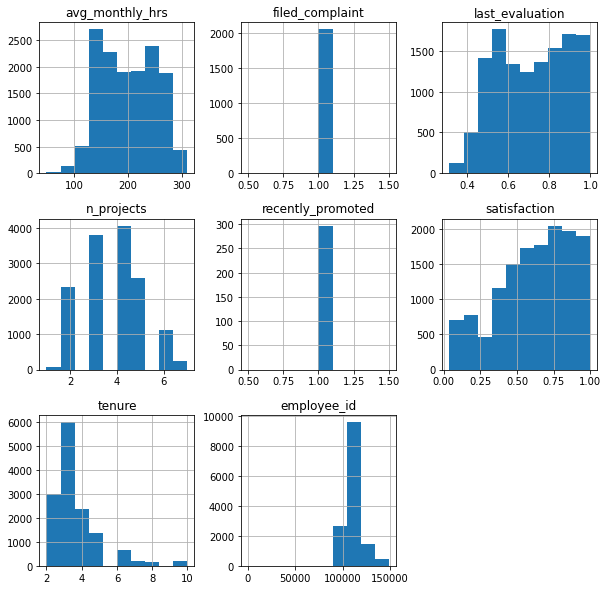

In [ ]:
emp_data.hist(figsize = (10,10) , xrot = 0)

**Observations:**
1.Maximum of around 2500+ people work for 150 hours and also 2300 of them work for 250 hours.
2.  'filed_complaint' & 'recently_promoted' seem to be binary data. i.e: either '1' or '0'.
3. 'last_evaluation' ranges from 0.4 - 1.0
4.maximum no. of projects opted are 7. maximum no. of projects taken by employees is 4.
5.most of the people are seem to be satiesfied with their job.
6.maximum tenure opted is for 10 years. Tenure for most employees is 3.




In [ ]:
emp_data.describe(include='all')

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
count,14150.000000,13443,2046.0,12663.000000,14150.000000,297.0,14150,14000.000000,14150,14000.000000,14150.000000
unique,NaN,12,NaN,NaN,NaN,NaN,3,NaN,2,NaN,NaN
top,NaN,D00-SS,NaN,NaN,NaN,NaN,low,NaN,Employed,NaN,NaN
freq,NaN,3905,NaN,NaN,NaN,NaN,6906,NaN,10784,NaN,NaN
mean,199.994346,NaN,1.0,0.718399,3.778304,1.0,NaN,0.621212,NaN,3.499357,112080.750247
std,50.833697,NaN,0.0,0.173108,1.250162,0.0,NaN,0.250482,NaN,1.462584,8748.202856
min,49.000000,NaN,1.0,0.316175,1.000000,1.0,NaN,0.040058,NaN,2.000000,0.000000
25%,155.000000,NaN,1.0,0.563711,3.000000,1.0,NaN,0.450356,NaN,3.000000,105772.500000
50%,199.000000,NaN,1.0,0.724731,4.000000,1.0,NaN,0.652394,NaN,3.000000,111291.500000
75%,245.000000,NaN,1.0,0.871409,5.000000,1.0,NaN,0.824925,NaN,4.000000,116650.750000


**Observation:**

1.   min & max of 'filed_complaint' is 1. Thus it can be interpreted as there is only one file complained.
2.   min & max of 'recently_promoted' is 1. Thus it can be interpreted as there is only one promotion in last 3 years.



In [ ]:
emp_data.sample(5)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
2874,249.0,D00-ENG,NaN,NaN,3,NaN,low,0.640684,Employed,3.0,106271
11117,206.0,D00-MT,NaN,0.823949,4,NaN,medium,0.517754,Employed,2.0,111986
8241,264.0,D00-ENG,NaN,0.699659,5,NaN,low,0.457600,Employed,2.0,118720
8068,248.0,D00-ENG,NaN,0.815005,4,NaN,low,0.885869,Employed,3.0,111455
11674,202.0,D00-PR,NaN,0.755866,3,NaN,medium,0.764341,Employed,2.0,119202


## observation
- Each employee must have 1 unique ID. we will also check the corrosponding department if duplicates are enlisted with other department too.
- department id from dep_data set gives us that there are total 11 department but here in emp_data set we have 12. 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


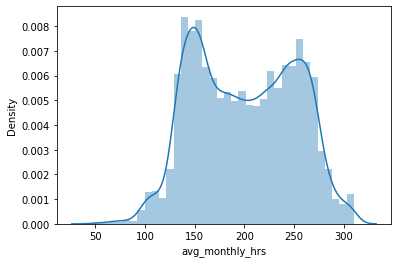

In [ ]:
sns.distplot(emp_data['avg_monthly_hrs'] , kde  = True )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


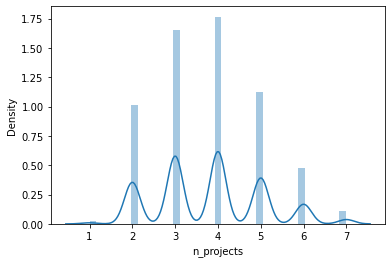

In [ ]:
sns.distplot(emp_data['n_projects'], kde = True)

**Categorical data visualization:**

In [ ]:
emp_data.describe(include = ['object'])

,department,salary,status
count,13443,14150,14150
unique,12,3,2
top,D00-SS,low,Employed
freq,3905,6906,10784


# preprocessing of employee data set

In [ ]:
pip install sweetviz

In [ ]:
import sweetviz

In [ ]:
my_report_emp_data = sweetviz.analyze(emp_data)
my_report_emp_data.show_html('emp_data_Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report emp_data_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## sweetviz report analysis Observation
- we have total 0 duplicates
- we do have missing values but target variable i.e. Status is free from any missing values.
- tenure has 150 missing values
- employee_id has no duplicates 
- out of 14087 ,24% i.e. 3347 people have resigned and 10740 are still employed i.e. 76% 
- 1/4 of population has resigned but this number can be brought down and that is the goal of this project

# data cleaning


In [ ]:
# before cleaning
emp_data.shape

(14150, 11)

In [ ]:
# counting duplicates
emp_data.duplicated().value_counts()

False    14121
True        29
dtype: int64

In [ ]:
# dropping duplicates in employee dataset , here we are dropping duplicate rows
#emp_data = emp_data.drop_duplicates()  # we can also use inplace =true

In [ ]:
# checking the shape after dropping duplicates
#emp_data.shape

In [ ]:
# confirming duplicates absence
emp_data.duplicated().any()

True

In [ ]:
# counting number of employee_id
emp_data['employee_id'].value_counts().sum()

14150

In [ ]:
# since we want unique employee_id in each row lets check for duplicates
emp_data[emp_data['employee_id'].duplicated()].shape

(33, 11)

In [ ]:
emp_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707


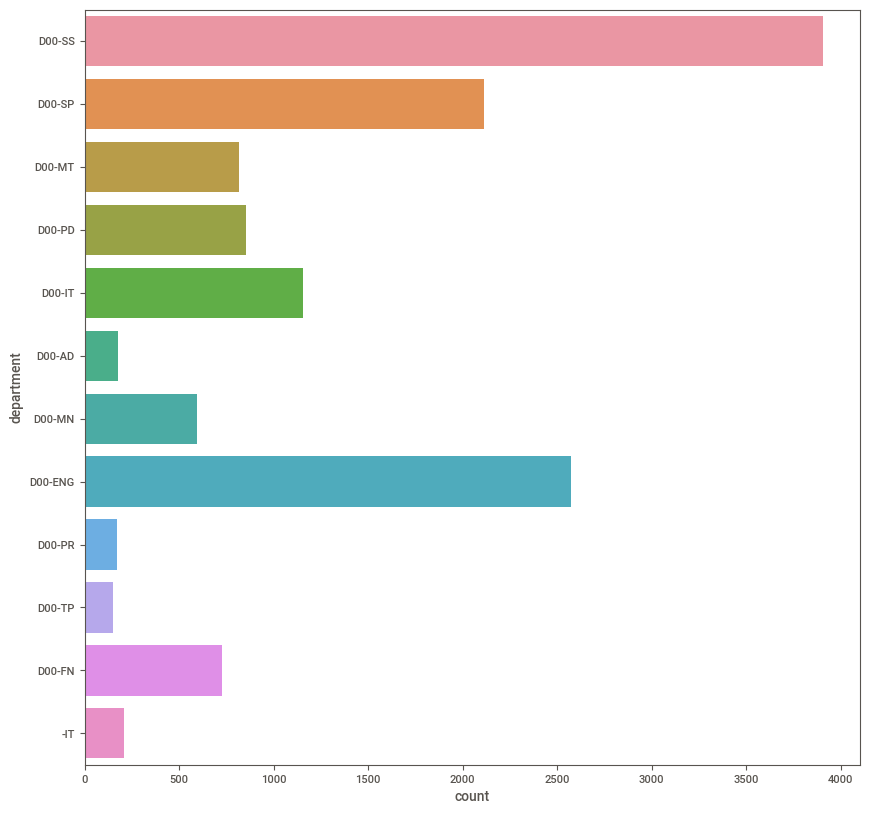

In [ ]:
plt.figure( figsize = (10,10))
sns.countplot( data= emp_data , y = 'department'  )

## correcting the Department column

In [ ]:
# comparing the dept_id from department dataset to employee dataset
emp_data['department'].value_counts()

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1157
D00-PD      855
D00-MT      815
D00-FN      725
D00-MN      593
-IT         207
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

In [ ]:
dept['dept_id'].value_counts()

D00-IT     1
D00-SS     1
D00-TP     1
D00-ENG    1
D00-SP     1
D00-FN     1
D00-PR     1
D00-AD     1
D00-MN     1
D00-MT     1
D00-PD     1
Name: dept_id, dtype: int64

### observation
- on comparing the two datsets i.e department and employee data we found that employee data set shows 12 department.
- on cross verfying both dataset it is clear that department = IT and D00IT are same.
- renaming the IT to D00IT

In [ ]:
emp_data['salary'].value_counts()

low       6906
medium    6101
high      1143
Name: salary, dtype: int64

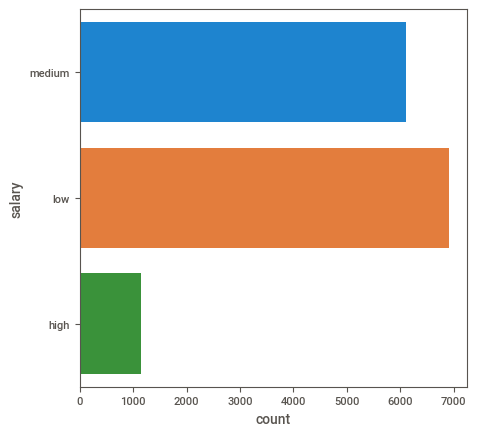

In [ ]:
plt.figure(figsize = (5,5))
sns.countplot(data = emp_data , y = 'salary' )

In [ ]:
''' All these methods have same error

emp_data['department'] = emp_data['department'].replace({'-IT','D00-IT'})

emp_data.update(emp_data['department'].replace({'-IT','D00-IT'}))

emp_data['department'] = np.where((emp_data['department']=='-IT'), 'D00-IT', emp_data['department'])

emp_data.loc[emp_data['department']=='-IT', ['department']] = 'D00-IT'

'''

" All these methods have same error\n\nemp_data['department'] = emp_data['department'].replace({'-IT','D00-IT'})\n\nemp_data.update(emp_data['department'].replace({'-IT','D00-IT'}))\n\nemp_data['department'] = np.where((emp_data['department']=='-IT'), 'D00-IT', emp_data['department'])\n\nemp_data.loc[emp_data['department']=='-IT', ['department']] = 'D00-IT'\n\n"

In [ ]:
emp_data['department'].value_counts()

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1157
D00-PD      855
D00-MT      815
D00-FN      725
D00-MN      593
-IT         207
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

### observation
- we can see now that D00-IT count has increased as the -IT count is merged with it

# EDA on EMployee Data set

In [ ]:
emp_data.status.value_counts()

Employed    10784
Left         3366
Name: status, dtype: int64

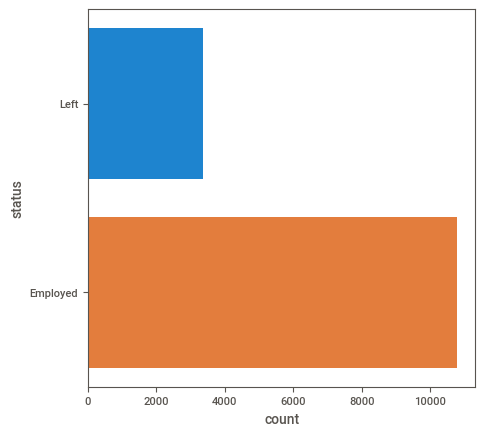

In [ ]:
plt.figure(figsize = (5,5))
sns.countplot(data = emp_data , y = 'status' )

**Segmentation**

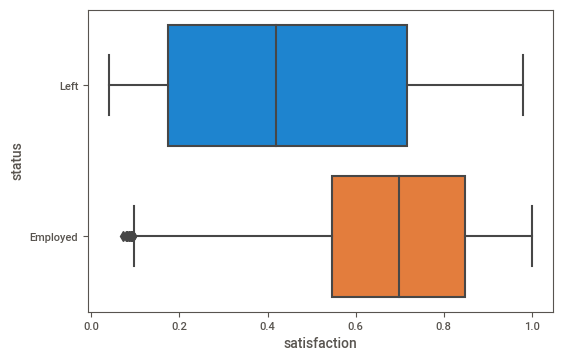

In [ ]:
sns.boxplot(y = 'status' , x = 'satisfaction' , data = emp_data )

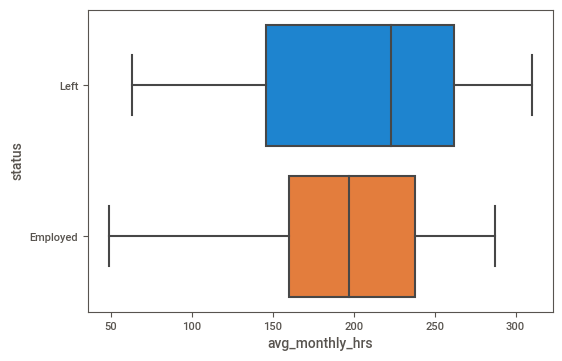

In [ ]:
sns.boxplot(y = 'status' , x = 'avg_monthly_hrs' , data = emp_data )

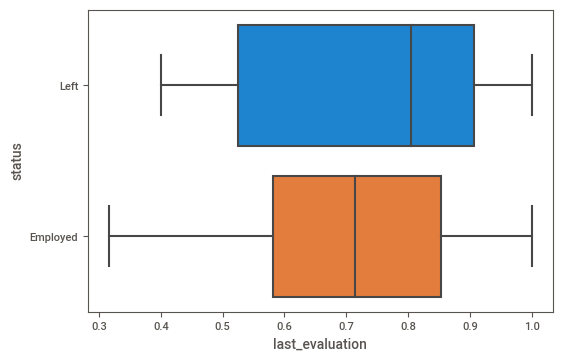

In [ ]:
sns.boxplot(y = 'status' , x = 'last_evaluation' , data = emp_data )

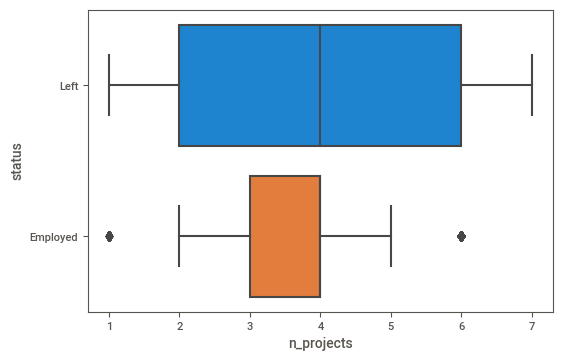

In [ ]:
sns.boxplot(y = 'status' , x = 'n_projects' , data = emp_data )

**Observations:**

1.  The employees who left the company where unsatisfied as compared to those who are employed.
2.   The average monthly hours of the emplyees who left was more as compared to the employees who are working in the company.
3.   The employees who left had more average evaluation than employed.
4.   The employees who left had more project than employed.




**Bivariate Analysis:**

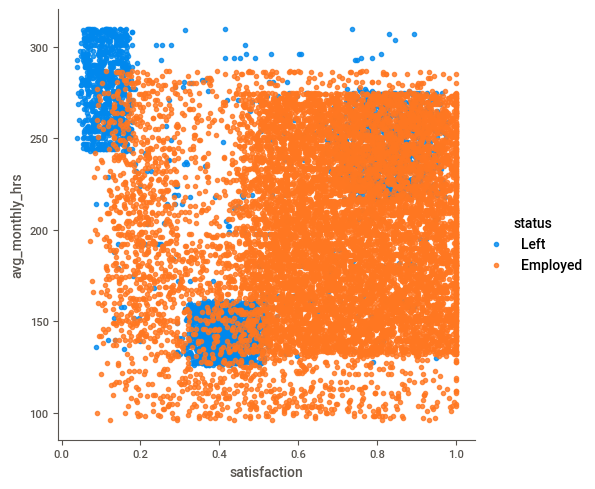

In [ ]:
sns.lmplot(data = emp_data , x = 'satisfaction' , y = 'avg_monthly_hrs' , hue = 'status' , fit_reg = False)

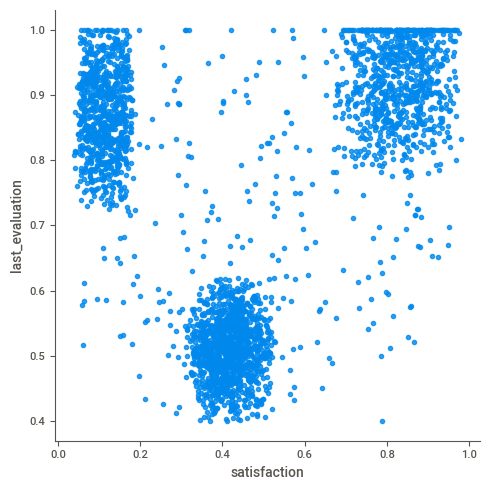

In [ ]:
sns.lmplot(x='satisfaction', y='last_evaluation', data=emp_data[emp_data.status == 'Left'], fit_reg=False)

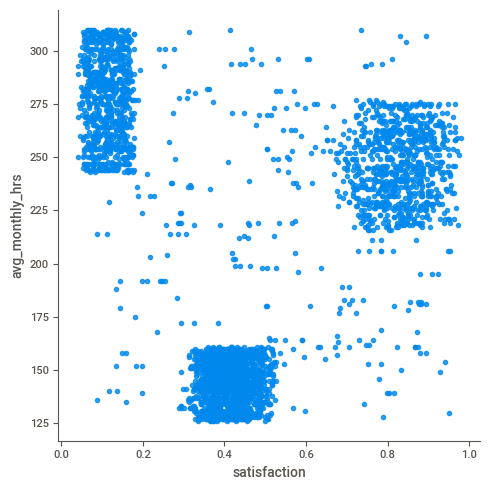

In [ ]:
sns.lmplot(x='satisfaction', y='avg_monthly_hrs', data=emp_data[emp_data.status == 'Left'], fit_reg=False)

**Heatmap representation and feature correlation**

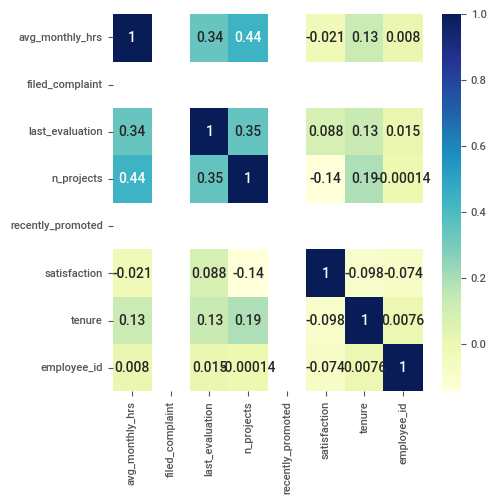

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(emp_data.corr(), cmap = 'YlGnBu', annot = True )

**Data Cleaning:**

In [ ]:
emp_data.shape

(14150, 11)

In [ ]:
emp_data.duplicated().value_counts()

False    14121
True        29
dtype: int64

In [ ]:
 # removing the temp record .
data = emp_data[emp_data.department != 'temp']   
emp_data.shape

(14150, 11)

In [ ]:
# Find the unique elements of an filed_complaint and recently_promoted.
print(emp_data['filed_complaint'].unique())       
print(emp_data['recently_promoted'].unique())

[nan  1.]
[nan  1.]


In [ ]:
# Filling missing numerical values with zero.
emp_data['filed_complaint'] = emp_data.filed_complaint.fillna(0)
emp_data['recently_promoted'] = emp_data.recently_promoted.fillna(0)

In [ ]:
emp_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,None,0.0,0.866838,6,0.0,medium,0.134415,Left,4.0,124467
1,134.0,None,0.0,0.555718,2,0.0,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,0.0,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,0.0,0.961360,6,0.0,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,0.0,0.507349,2,0.0,medium,0.434845,Left,3.0,113707


In [ ]:
emp_data.tail()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
14145,245.0,D00-SS,0.0,0.850785,6,0.0,medium,0.225084,Employed,5.0,101809
14146,192.0,D00-SS,0.0,0.951901,3,0.0,medium,0.539834,Employed,3.0,116153
14147,175.0,D00-MN,0.0,0.854538,4,0.0,medium,0.934465,Employed,3.0,119780
14148,268.0,D00-MT,0.0,0.900887,5,0.0,medium,0.906613,Left,5.0,115325
14149,268.0,D00-IT,1.0,0.897098,2,0.0,low,0.459371,Employed,4.0,112312


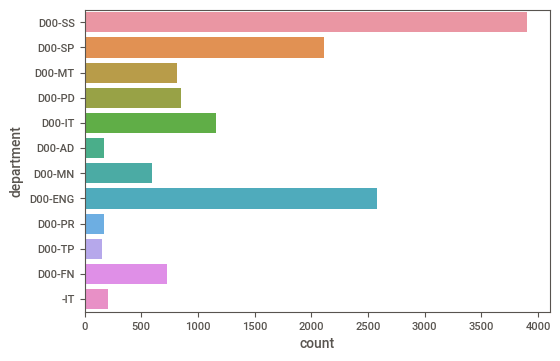

In [ ]:
# updated graph
sns.countplot( y = 'department' , data = emp_data)

In [ ]:
# re-checking the features
emp_data.isnull().sum()

avg_monthly_hrs         0
department            707
filed_complaint         0
last_evaluation      1487
n_projects              0
recently_promoted       0
salary                  0
satisfaction          150
status                  0
tenure                150
employee_id             0
dtype: int64

In [ ]:
# filling the missing categorical values as 'missing'
emp_data['department'].fillna("missing" , inplace = True)

In [ ]:
# creating a new feature for handling the missing data in 'last_evaluation' 
emp_data['missing_last_evaluation'] = emp_data.last_evaluation.isnull().astype(int)

In [ ]:
emp_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,missing_last_evaluation
0,246.0,missing,0.0,0.866838,6,0.0,medium,0.134415,Left,4.0,124467,0
1,134.0,missing,0.0,0.555718,2,0.0,low,0.511041,Left,3.0,112210,0
2,156.0,D00-SS,1.0,0.474082,2,0.0,medium,0.405101,Left,3.0,126150,0
3,256.0,D00-SP,0.0,0.961360,6,0.0,low,0.152974,Left,4.0,125346,0
4,146.0,D00-SS,0.0,0.507349,2,0.0,medium,0.434845,Left,3.0,113707,0


In [ ]:
# now replacing the missing data of 'NAN' last_evaluation with '0'
emp_data.last_evaluation.fillna(0 , inplace = True)

In [ ]:
emp_data.head(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,missing_last_evaluation
0,246.0,missing,0.0,0.866838,6,0.0,medium,0.134415,Left,4.0,124467,0
1,134.0,missing,0.0,0.555718,2,0.0,low,0.511041,Left,3.0,112210,0
2,156.0,D00-SS,1.0,0.474082,2,0.0,medium,0.405101,Left,3.0,126150,0
3,256.0,D00-SP,0.0,0.961360,6,0.0,low,0.152974,Left,4.0,125346,0
4,146.0,D00-SS,0.0,0.507349,2,0.0,medium,0.434845,Left,3.0,113707,0
5,135.0,D00-MT,0.0,0.482184,2,0.0,low,0.381545,Left,3.0,121685,0
6,270.0,D00-PD,0.0,0.867087,6,0.0,low,0.172575,Left,4.0,119912,0
7,244.0,D00-IT,0.0,0.926197,6,0.0,medium,0.061868,Left,5.0,112868,0
8,289.0,D00-IT,0.0,0.929858,7,0.0,low,0.161744,Left,4.0,122314,0
9,281.0,D00-SS,0.0,0.907965,6,0.0,medium,0.105749,Left,4.0,122394,0


In [ ]:
# re-checking for missing data
emp_data.isnull().sum()

avg_monthly_hrs              0
department                   0
filed_complaint              0
last_evaluation              0
n_projects                   0
recently_promoted            0
salary                       0
satisfaction               150
status                       0
tenure                     150
employee_id                  0
missing_last_evaluation      0
dtype: int64

In [ ]:
# filling the missing categorical values as 'missing'
emp_data['satisfaction'].fillna("missing" , inplace = True)

In [ ]:
# filling the missing categorical values as 'missing'
emp_data['tenure'].fillna("missing" , inplace = True)

In [ ]:
emp_data.isnull().sum()

avg_monthly_hrs            0
department                 0
filed_complaint            0
last_evaluation            0
n_projects                 0
recently_promoted          0
salary                     0
satisfaction               0
status                     0
tenure                     0
employee_id                0
missing_last_evaluation    0
dtype: int64

In [ ]:
#df = emp_data

In [ ]:
#df["last_evaluation"] = [float(str(i).replace(",", "")) for i in df["last_evaluation"]]

In [ ]:
#df.head(10)

In [ ]:
#ds  = emp_data

In [ ]:
#ds["satisfaction"] = [float(str(i).replace(",", "")) for i in ds["satisfaction"]]

In [ ]:
#df.head()

**Feature Engineering**

In [ ]:
#sns.lmplot(y = 'last_evaluation' , x = 'satisfaction' , data = df[df.status == 'Left' ] , fit_reg = False)

**Observations**

1.   Trying to implement few new features like "underperformer", "unhappy" & "overachiever" from the above chart values to do more  analysis  but got stuck  with the  data type issue  
2. So currently not working further as of now on Feature Engg part 



In [ ]:
# Convert status to an indicator variable : the reson for this step is Regression analysis requires numerical variables. 
#So, when a researcher wishes to include a categorical variable in a regression model, supplementary steps are required to make the results interpretable. 
#In these steps, the categorical variables are recoded into a set of separate binary variables
emp_data['status'] = pd.get_dummies( emp_data.status ).Left

In [ ]:
emp_data.status.mean()

0.23787985865724381

In [ ]:
emp_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,missing_last_evaluation
0,246.0,missing,0.0,0.866838,6,0.0,medium,0.134415,1,4.0,124467,0
1,134.0,missing,0.0,0.555718,2,0.0,low,0.511041,1,3.0,112210,0
2,156.0,D00-SS,1.0,0.474082,2,0.0,medium,0.405101,1,3.0,126150,0
3,256.0,D00-SP,0.0,0.961360,6,0.0,low,0.152974,1,4.0,125346,0
4,146.0,D00-SS,0.0,0.507349,2,0.0,medium,0.434845,1,3.0,113707,0


One-Hot Encoding for categorical variables

In [ ]:
#Converting the categorical nominal features into numerical features
emp_data = pd.get_dummies(emp_data, columns = ['department' , 'salary'])

In [ ]:
emp_data.head(10)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,employee_id,missing_last_evaluation,...,department_D00-MT,department_D00-PD,department_D00-PR,department_D00-SP,department_D00-SS,department_D00-TP,department_missing,salary_high,salary_low,salary_medium
0,246.0,0.0,0.866838,6,0.0,0.134415,1,4.0,124467,0,...,0,0,0,0,0,0,1,0,0,1
1,134.0,0.0,0.555718,2,0.0,0.511041,1,3.0,112210,0,...,0,0,0,0,0,0,1,0,1,0
2,156.0,1.0,0.474082,2,0.0,0.405101,1,3.0,126150,0,...,0,0,0,0,1,0,0,0,0,1
3,256.0,0.0,0.961360,6,0.0,0.152974,1,4.0,125346,0,...,0,0,0,1,0,0,0,0,1,0
4,146.0,0.0,0.507349,2,0.0,0.434845,1,3.0,113707,0,...,0,0,0,0,1,0,0,0,0,1
5,135.0,0.0,0.482184,2,0.0,0.381545,1,3.0,121685,0,...,1,0,0,0,0,0,0,0,1,0
6,270.0,0.0,0.867087,6,0.0,0.172575,1,4.0,119912,0,...,0,1,0,0,0,0,0,0,1,0
7,244.0,0.0,0.926197,6,0.0,0.061868,1,5.0,112868,0,...,0,0,0,0,0,0,0,0,0,1
8,289.0,0.0,0.929858,7,0.0,0.161744,1,4.0,122314,0,...,0,0,0,0,0,0,0,0,1,0
9,281.0,0.0,0.907965,6,0.0,0.105749,1,4.0,122394,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
# saving the datafile into csv format.
data.to_csv('C:\\Users\\ram.kumar.choudhary\\Desktop\\cloud\\insaid\\Capstone_HR_Data\\EM_R_updated_table.csv' , index = None)

Machine learning Models

In [ ]:
df = pd.read_csv("C:\\Users\\ram.kumar.choudhary\\Desktop\\cloud\\insaid\\Capstone_HR_Data\\EM_R_updated_table.csv")

**Data preparation:**

In [ ]:
data.shape

(14150, 11)

Train test split

In [ ]:
# Create separate object for target variable
y = data.status
# Create separate object for input features
X = data.drop('status' , axis = 1)

In [ ]:
#Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=df.status)

NameError: ignored

In [ ]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Data standardization




1.   In Data Standardization we perform zero mean centring and unit scaling; i.e. we make the mean of all the features as zero and the standard deviation as 1.
2.   Thus we use mean and standard deviation of each feature.
3.It is very important to save the mean and standard deviation for each of the feature from the training set, because we use the same mean and standard deviation in the test set.



In [ ]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
#import xgboost
import os
mingw_path = 'C:\\Users\\ram.kumar.choudhary\\Desktop\\cloud\\insaid\\Capstone_HR_Data\\EM_R_updated_table.csv'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

from xgboost import XGBClassifier
from xgboost import plot_importance  # to plot feature importance


In [ ]:
np.set_printoptions(precision=2, suppress=True)

In [ ]:
train_mean = X_train.mean()
train_std = X_train.std()

In [ ]:
X_train = (X_train - train_mean) / train_std

In [ ]:
X_train.describe()

In [ ]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [ ]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

In [ ]:
! pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=a6bc28210ff929b6ff5ccb32e25110aa42c65ac01c521bddac984199749ff96a
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


In [ ]:
from pyforest import *       ## import the basic libraries

 ## Function for splitting training and test set
from sklearn.model_selection import train_test_split 

##from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler  

 ##Library to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV       
from sklearn.model_selection import RandomizedSearchCV   

##importing models
from sklearn.linear_model import LogisticRegression    
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

## Evaluation metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

## Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
import pickle

In [ ]:
## stratify:  to ensure that the train and test sets have approximately 
##the same percentage of samples of each target class as the complete set.
x_train ,  x_test ,y_train , y_test = train_test_split(X, y , test_size = 0.2 , stratify = data.status , random_state =1234)

In [ ]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((11320, 10), (11320,), (2830, 10), (2830,))

**Data Standardization (using Z-Score method)**

In [ ]:
train_mean = x_train.mean()
train_std = x_train.std()

In [ ]:
## Save these mean and std dev values
train_mean.to_pickle("Save/train_mean.pkl")
train_std.to_pickle("Save/train_std.pkl")

In [ ]:
x_train = (x_train - train_mean)/ train_std

In [ ]:
x_train.describe()

,avg_monthly_hrs,employee_id,filed_complaint_1.0,last_evaluation,n_projects,recently_promoted_1.0,satisfaction,tenure
count,1.132000e+04,1.132000e+04,1.132000e+04,1.012400e+04,1.132000e+04,1.132000e+04,1.119700e+04,1.119700e+04
mean,1.300589e-16,-5.548663e-16,-8.921015e-16,-3.249475e-15,-3.451597e-16,7.447125e-16,-3.960252e-15,1.091681e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.970212e+00,-1.266715e+01,-4.110031e-01,-2.319518e+00,-2.216584e+00,-1.423995e-01,-2.319347e+00,-1.028330e+00
25%,-8.800855e-01,-7.127172e-01,-4.110031e-01,-8.945142e-01,-6.178753e-01,-1.423995e-01,-6.857523e-01,-3.447101e-01
50%,-3.220403e-02,-9.295462e-02,-4.110031e-01,2.883204e-02,1.814788e-01,-1.423995e-01,1.256371e-01,-3.447101e-01
75%,8.748320e-01,5.158750e-01,-4.110031e-01,8.883228e-01,9.808330e-01,-1.423995e-01,8.118197e-01,3.389100e-01
max,2.176231e+00,4.164248e+00,2.432857e+00,1.631259e+00,2.579541e+00,7.021877e+00,1.512548e+00,4.440630e+00


In [ ]:
x_test = (x_test - train_mean)/train_std

In [ ]:
x_test.describe()

,avg_monthly_hrs,employee_id,filed_complaint_1.0,last_evaluation,n_projects,recently_promoted_1.0,satisfaction,tenure
count,2830.000000,2830.000000,2830.000000,2539.000000,2830.000000,2830.000000,2803.000000,2803.000000
mean,0.035604,-0.008666,0.001005,0.021537,0.021326,0.039872,0.002505,-0.016680
std,1.011360,0.941599,1.001148,1.000647,0.996600,1.128304,0.999557,0.999327
min,-2.654721,-1.351295,-0.411003,-2.240725,-2.216584,-0.142399,-2.314384,-1.028330
25%,-0.880085,-0.720966,-0.411003,-0.860618,-0.617875,-0.142399,-0.664935,-0.344710
50%,0.026950,-0.087983,-0.411003,0.084995,0.181479,-0.142399,0.120312,-0.344710
75%,0.914268,0.506383,-0.411003,0.889429,0.980833,-0.142399,0.818147,0.338910
max,2.176231,4.168881,2.432857,1.631259,2.579541,7.021877,1.512548,4.440630


**Model Application**

**1. Logistic regression**

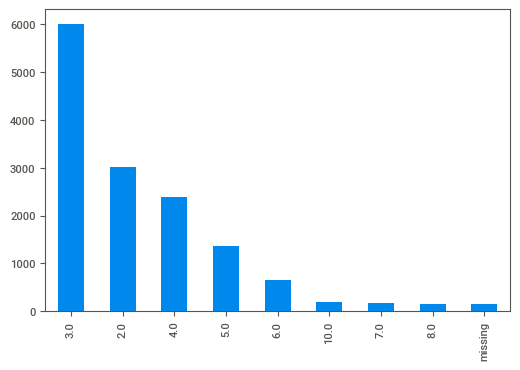

In [ ]:
emp_data.tenure.value_counts().plot.bar()

## observation
- Its clear that most number of the employees are having worked for 3 years.

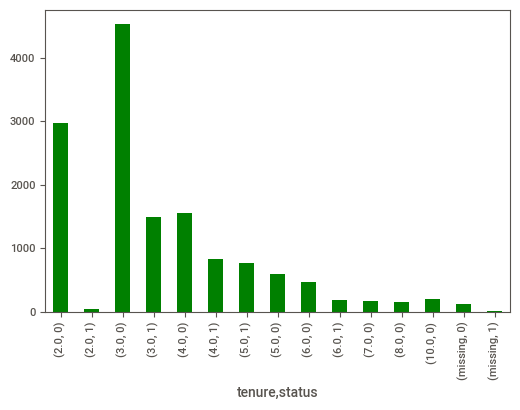

In [ ]:
# grouping by number of years in service to status of employees
emp_data.groupby(by ='tenure')['status'].value_counts().plot.bar(color='green')


In [ ]:
emp_data.groupby(by ='tenure')['status'].value_counts()

tenure   status
2.0      0         2975
         1           48
3.0      0         4523
         1         1495
4.0      0         1555
         1          839
5.0      1          774
         0          595
6.0      0          470
         1          190
7.0      0          180
8.0      0          155
10.0     0          201
missing  0          130
         1           20
Name: status, dtype: int64

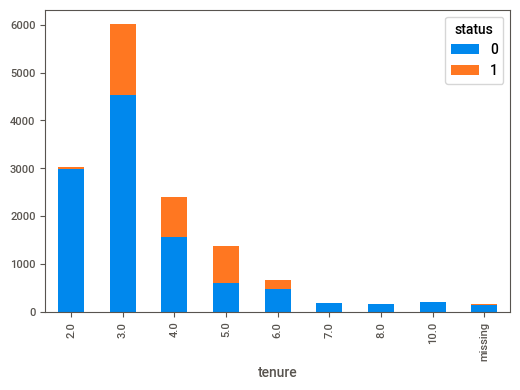

In [ ]:
emp_data.groupby(['tenure', 'status']).size().unstack().plot(kind='bar', stacked=True)

## observation
- we can see that employees with work span of 7 yrs have not left. but their numbers are quite low. 
- number of people with 3 years of experience is quite high at the same time number of employees leaving after 3 years.
- 2 years : 1.5 % resigned
- 3 years : 24.84 % resigned
- 4 years : 34.95 % resigned
- 5 years : 56.56 % resigned 
- 6 years : 28.78 % resigned
- 8/9/10 years : 0 %

- we can clearly see that resignation is increasing as the year is increasing and is highest at 5 years. and then declined sharply.
- on closely looking we can understand than number of people with employement status of 3, 4 and 5 years have bigger resignation number. its crucial to our study 


# Post cleaning processing of employee data set

In [ ]:
emp_data['satisfaction'] = emp_data['satisfaction'].astype(str)

In [ ]:
df['tenure'] = df['tenure'].astype(str)

In [ ]:
my_report_2 = sweetviz.analyze(emp_data)
my_report_2.show_html('emp_data_Report_2.html')

                                             |          | [  0%]   00:00 -> (? left)

TypeError: ignored

## observation
- from the report we have the following output.
- status (target Variable) is highly correlated with satisfaction and employee_id
- satisfaction is correlated with n_projects (0.59),tenure (0.38) , status (0.37), department (0.25)
- Tenure is correlated with last_evaluation (0.42), satisfaction (0.38), avg_monthly_hrs (0.36)




---
## Merging all data set to make a new data set 'hr'


## Steps to merge
- We have 3 data set viz. 
-- Department Data set
-- Employee Detail
-- Employee Data

- We will merge the Employee Detail with Employee Data first on common column employee_id and Rename to 'emp'
- we will then merge Department dataset with emp on common column Department ID 

In [ ]:
emp = pd.merge(emp_data,emp_detail,on='employee_id',how='inner')

<IPython.core.display.Javascript object>

In [ ]:
emp.head(1)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,employee_id,missing_last_evaluation,...,department_D00-SP,department_D00-SS,department_D00-TP,department_missing,salary_high,salary_low,salary_medium,age,gender,marital_status
0,246.0,0.0,0.866838,6,0.0,0.134415,1,4.0,124467,0,...,0,0,0,1,0,0,1,42,Female,Married


In [ ]:
emp.shape

(14145, 29)

In [ ]:
# left join can also be used as it keeps all the emp_data rows
# emp1 = pd.merge(emp_data,emp_detail,on='employee_id',how='left')
# emp1.shape

In [ ]:
# rename the department column in emp data set to dept_id
emp.rename(columns={'department':'dept_id'},inplace=True)
emp.head(10)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,employee_id,missing_last_evaluation,...,department_D00-SP,department_D00-SS,department_D00-TP,department_missing,salary_high,salary_low,salary_medium,age,gender,marital_status
0,246.0,0.0,0.866838,6,0.0,0.134415,1,4.0,124467,0,...,0,0,0,1,0,0,1,42,Female,Married
1,134.0,0.0,0.555718,2,0.0,0.511041,1,3.0,112210,0,...,0,0,0,1,0,1,0,23,Female,Unmarried
2,156.0,1.0,0.474082,2,0.0,0.405101,1,3.0,126150,0,...,0,1,0,0,0,0,1,24,Female,Unmarried
3,256.0,0.0,0.961360,6,0.0,0.152974,1,4.0,125346,0,...,1,0,0,0,0,1,0,51,Female,Married
4,146.0,0.0,0.507349,2,0.0,0.434845,1,3.0,113707,0,...,0,1,0,0,0,0,1,23,Female,Unmarried
5,135.0,0.0,0.482184,2,0.0,0.381545,1,3.0,121685,0,...,0,0,0,0,0,1,0,23,Female,Unmarried
6,270.0,0.0,0.867087,6,0.0,0.172575,1,4.0,119912,0,...,0,0,0,0,0,1,0,24,Female,Unmarried
7,244.0,0.0,0.926197,6,0.0,0.0618684,1,5.0,112868,0,...,0,0,0,0,0,0,1,29,Female,Married
8,289.0,0.0,0.929858,7,0.0,0.161744,1,4.0,122314,0,...,0,0,0,0,0,1,0,36,Female,Married
9,281.0,0.0,0.907965,6,0.0,0.105749,1,4.0,122394,0,...,0,1,0,0,0,0,1,50,Female,Married


In [ ]:
hr = pd.merge(emp,dept,on='dept_id',how='inner')
hr.head()

# EDA post Merging All datasets 

In [ ]:
hr.groupby(by ='dept_name')['status'].value_counts().plot.bar(color='green')

NameError: ignored

In [ ]:
hr.groupby(by ='dept_name')['status'].value_counts()

In [ ]:
hr.groupby(['dept_name', 'status']).size().unstack().plot(kind='bar', stacked=True)

## observation
- % of people who left department wise are as follows

In [ ]:
def logit():

  # Instantiating Random Forest classifier model.
  log_cf = LogisticRegression(random_state=42, class_weight='balanced')
  
  # Fitting the model on train set.
  log_cf.fit(X_train, y_train)
  
  # Prediction on validation set.
  y_pred = log_cf.predict(X_test)
  
  # Printing the classification report.
  print((classification_report(y_test, y_pred)))

In [ ]:
%%time
logit()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
df = pd.DataFrame(data)
  
# Remove two columns name is 'C' and 'D'
# Create separate object for target variable
one_hot_encoded_data = pd.get_dummies(data, columns = ['filed_complaint', 'recently_promoted'])
y = one_hot_encoded_data.status
# Create separate object for input features
X = one_hot_encoded_data.drop('status' , axis = 1)
X['department'] = X['department'].astype('|S')
X['salary'] = X['salary'].astype('|S')
X['tenure'] = X['tenure'].astype('|S')
#one_hot_encoded_data.head
#one_hot_encoded_data.describe
X_train ,  X_test ,y_train , y_test= train_test_split(X, y , test_size = 0.2 , stratify = one_hot_encoded_data.status , random_state =1234)

X_train = X_train.replace((np.inf, -np.inf, np.nan), 0)
X_train.reset_index(drop=True, inplace=True)

y_train = y_train.replace((np.inf, -np.inf, np.nan), 0)
y_train.reset_index(drop=True, inplace=True)

X_test = X_test.replace((np.inf, -np.inf, np.nan), 0)
X_test.reset_index(drop=True, inplace=True)

y_test = y_test.replace((np.inf, -np.inf, np.nan), 0)
y_test.reset_index(drop=True, inplace=True)

#X_train.head

knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(X_train, y_train)
 
# Predict on dataset which model has not seen before
print(knn_pipe.predict(X_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ValueError: ignored

In [ ]:
X['department'] = X['department'].astype('|S')
X.dtypes

avg_monthly_hrs          float64
department                   |S7
last_evaluation          float64
n_projects                 int64
salary                       |S6
satisfaction             float64
tenure                       |S4
employee_id                int64
filed_complaint_1.0        uint8
recently_promoted_1.0      uint8
dtype: object

In [ ]:
X.head

<bound method NDFrame.head of        avg_monthly_hrs department  last_evaluation  n_projects  salary  \
0                246.0       None         0.866838           6  medium   
1                134.0       None         0.555718           2     low   
2                156.0     D00-SS         0.474082           2  medium   
3                256.0     D00-SP         0.961360           6     low   
4                146.0     D00-SS         0.507349           2  medium   
...                ...        ...              ...         ...     ...   
14145            245.0     D00-SS         0.850785           6  medium   
14146            192.0     D00-SS         0.951901           3  medium   
14147            175.0     D00-MN         0.854538           4  medium   
14148            268.0     D00-MT         0.900887           5  medium   
14149            268.0     D00-IT         0.897098           2     low   

       satisfaction tenure  employee_id  filed_complaint_1.0  \
0          0.1344

In [ ]:
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()

ValueError: ignored